## Import the Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


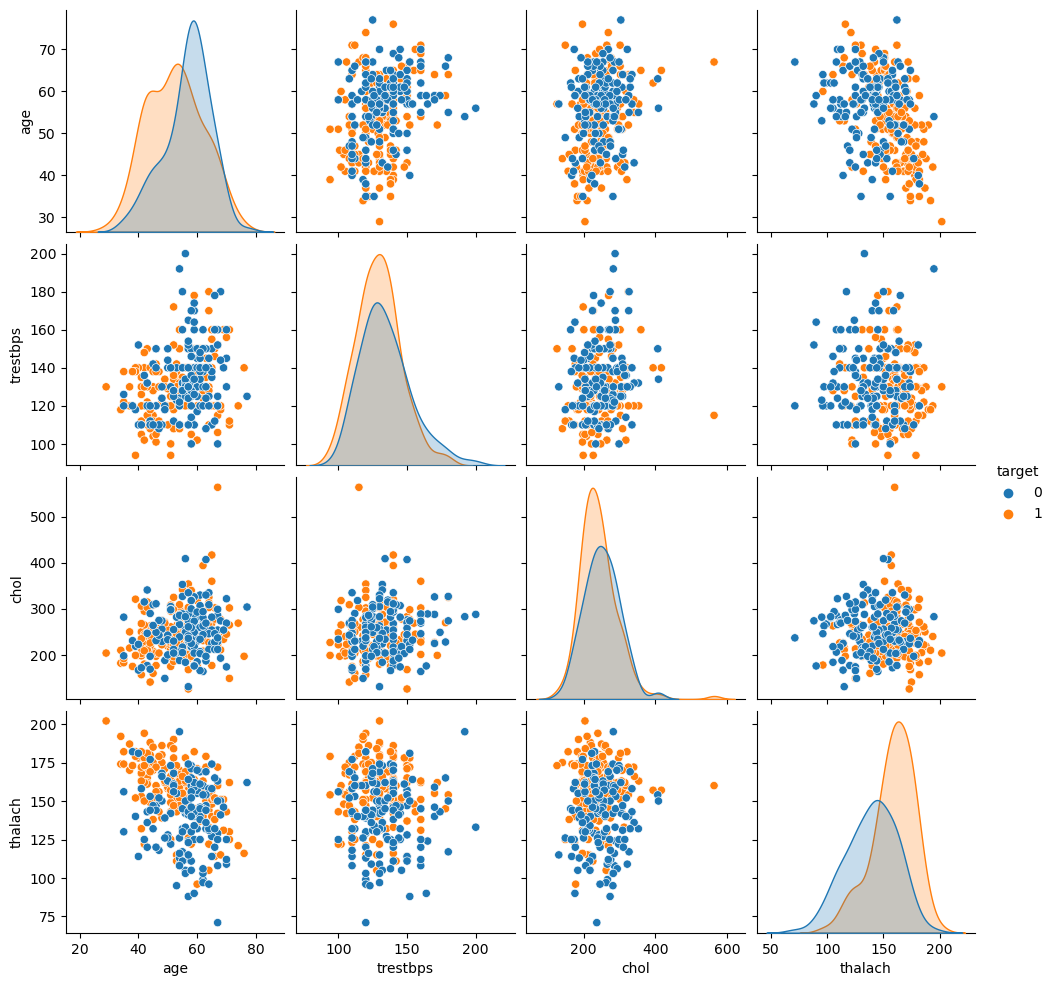

In [7]:
df1 = df[['age','trestbps','chol','thalach','target']]
sns.pairplot(df1, hue='target')

<Axes: >

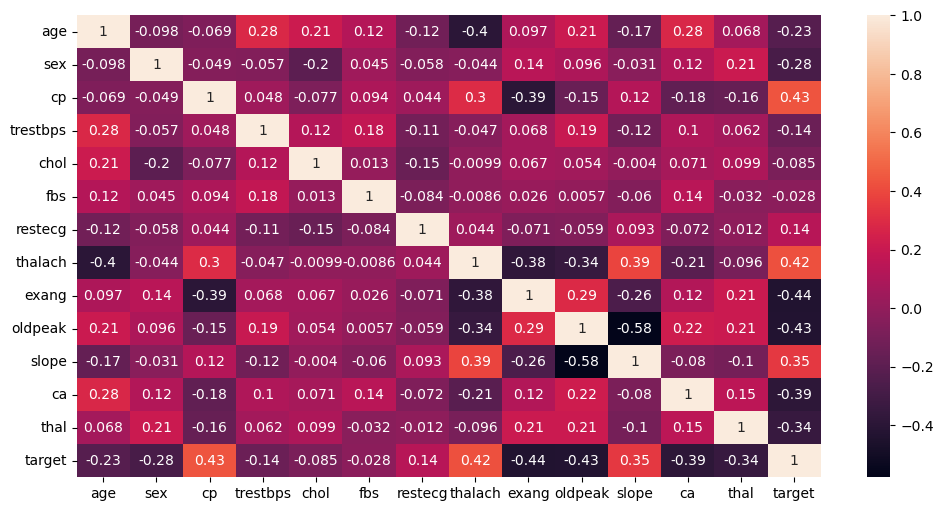

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

## Machine Learning

In [9]:
X = df.drop('target',axis=1)
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=101)

In [12]:
sc = StandardScaler()

In [13]:
sc.fit(X_train)
sc_X_train = sc.transform(X_train)
sc_X_test = sc.transform(X_test)

## Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegressionCV

In [15]:
log_model = LogisticRegressionCV(cv =5)

In [16]:
log_model.fit(sc_X_train, y_train)

LogisticRegressionCV(cv=5)

In [17]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [18]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [19]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])
coefs = coefs.sort_values()

<Axes: >

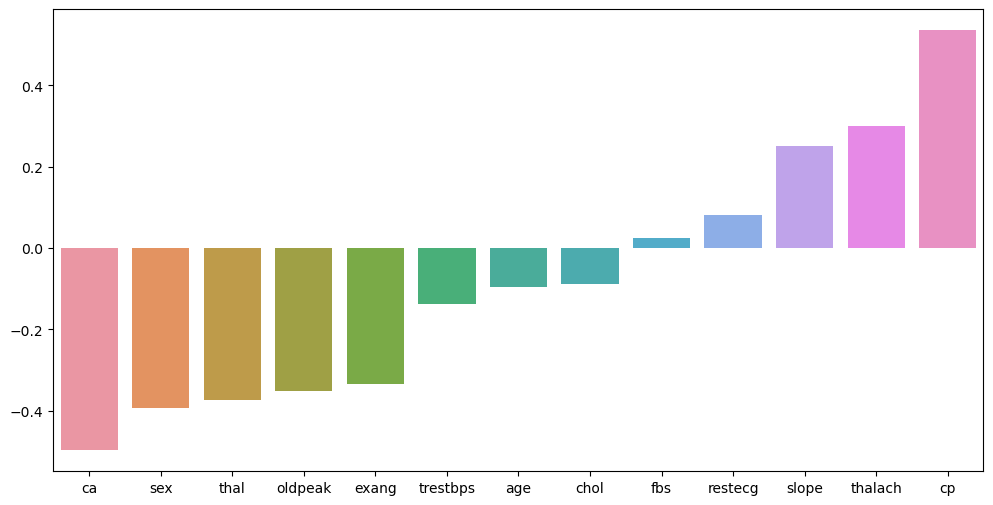

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x=coefs.index,y=coefs.values)

In [21]:
y_pred = log_model.predict(sc_X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0])

In [22]:
y_test

221    0
8      1
89     1
154    1
201    0
12     1
65     1
187    0
240    0
117    1
224    0
160    1
206    0
91     1
19     1
41     1
16     1
4      1
56     1
231    0
198    0
194    0
170    0
228    0
270    0
15     1
211    0
98     1
279    0
158    1
268    0
Name: target, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [24]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [26]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


age = 48
sex = 0
cp = 2
trestbps=130
chol=275
fbs=1
restecg=1
thalach=165
exang=0
oldpeak=1.3
slope=2
ca=2
thal=2

In [27]:
patient = [[48.0, 0.0,2,130,275,1,1,165,0,1.3,2,2,2]]

In [28]:
log_model.predict(patient)

array([1])

In [29]:
log_model.predict_proba(patient)

array([[0.10605249, 0.89394751]])